In [47]:
%pip install tensorflow pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [48]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten, GRU
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [49]:

# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [50]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("D:/Thái/Phân tích thống kê/Gold_data_filtered.csv")

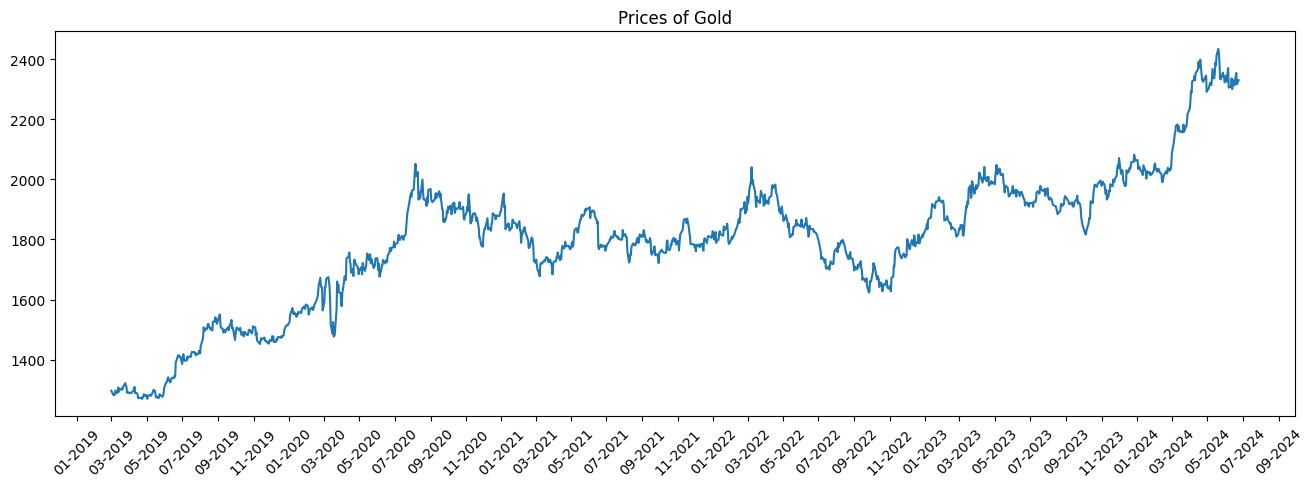

In [51]:
# Format column Date
df.index = pd.to_datetime(df.date,format='%m/%d/%Y')

# Flip the column
#df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

# Plot the 'close' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['close'])
plt.title('Prices of Gold')

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=2))
plt.xticks(rotation=45) 

plt.show()

Split dataset (7-2-1)

In [52]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [53]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [54]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [55]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.12881, saving model to save_model_7_2_1.keras
19/19 - 11s - 603ms/step - loss: 0.1288
Epoch 2/80

Epoch 2: loss improved from 0.12881 to 0.04733, saving model to save_model_7_2_1.keras
19/19 - 0s - 20ms/step - loss: 0.0473
Epoch 3/80

Epoch 3: loss improved from 0.04733 to 0.02205, saving model to save_model_7_2_1.keras
19/19 - 0s - 21ms/step - loss: 0.0221
Epoch 4/80

Epoch 4: loss improved from 0.02205 to 0.01840, saving model to save_model_7_2_1.keras
19/19 - 0s - 21ms/step - loss: 0.0184
Epoch 5/80

Epoch 5: loss improved from 0.01840 to 0.01752, saving model to save_model_7_2_1.keras
19/19 - 0s - 20ms/step - loss: 0.0175
Epoch 6/80

Epoch 6: loss improved from 0.01752 to 0.01720, saving model to save_model_7_2_1.keras
19/19 - 0s - 18ms/step - loss: 0.0172
Epoch 7/80

Epoch 7: loss did not improve from 0.01720
19/19 - 0s - 13ms/step - loss: 0.0174
Epoch 8/80

Epoch 8: loss did not improve from 0.01720
19/19 - 0s - 15ms/step - loss: 0

In [56]:

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step


In [57]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [58]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [59]:
# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [60]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.8956723338485317, 0.9111282843894899, 0.9312210200927358, 0.8991069895243002, 0.910784818821913]


In [61]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9112028479576111], [0.9059322476387024], [0.8992865085601807], [0.8926741480827332], [0.8869673013687134], [0.8818534016609192], [0.8769469857215881], [0.8720903396606445], [0.8672781586647034], [0.8625534176826477], [0.8579424619674683], [0.8534480333328247], [0.8490619659423828], [0.844775915145874], [0.8405847549438477], [0.8364855051040649], [0.8324756622314453], [0.8285528421401978], [0.824714183807373], [0.8209571838378906], [0.8172793984413147], [0.813677966594696], [0.8101508617401123], [0.806695818901062], [0.8033109307289124], [0.7999938726425171], [0.7967430353164673], [0.7935565114021301], [0.7904323935508728], [0.7873689532279968]]


In [62]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [63]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2330.48683673]
 [2324.3486956 ]
 [2316.60906787]
 [2308.90831286]
 [2302.26211917]
 [2296.30647157]
 [2290.59245957]
 [2284.93640957]
 [2279.33214358]
 [2273.82971023]
 [2268.45979121]
 [2263.22557962]
 [2258.11756554]
 [2253.12603078]
 [2248.24500561]
 [2243.47101924]
 [2238.80115623]
 [2234.23263996]
 [2229.76213846]
 [2225.3867363 ]
 [2221.10358742]
 [2216.9093599 ]
 [2212.80169358]
 [2208.77795069]
 [2204.83590993]
 [2200.97286408]
 [2197.18693893]
 [2193.47591318]
 [2189.83756553]
 [2186.26988293]]


Margin of Error: 83.33332450197362
Lower Bound of Future Prediction: [[2247.15351223]
 [2241.0153711 ]
 [2233.27574337]
 [2225.57498836]
 [2218.92879467]
 [2212.97314707]
 [2207.25913507]
 [2201.60308507]
 [2195.99881908]
 [2190.49638573]
 [2185.12646671]
 [2179.89225512]
 [2174.78424103]
 [2169.79270628]
 [2164.91168111]
 [2160.13769474]
 [2155.46783173]
 [2150.89931545]
 [2146.42881396]
 [2142.0534118 ]
 [2137.77026292]
 [2133.57603539]
 [2129.46836908]
 [2125.44462619]
 [2121.50258542]
 [2117.63953958]
 [2113.85361443]
 [2110.14258868]
 [2106.50424103]
 [2102.93655843]]
Upper Bound of Future Prediction: [[2413.82016123]
 [2407.6820201 ]
 [2399.94239237]
 [2392.24163736]
 [2385.59544368]
 [2379.63979608]
 [2373.92578407]
 [2368.26973407]
 [2362.66546808]
 [2357.16303474]
 [2351.79311571]
 [2346.55890412]
 [2341.45089004]
 [2336.45935528]
 [2331.57833011]
 [2326.80434375]
 [2322.13448074]
 [2317.56596446]
 [2313.09546296]
 [2308.7200608 ]
 [2304.43691193]
 [2300.2426844 ]
 [2296.13501

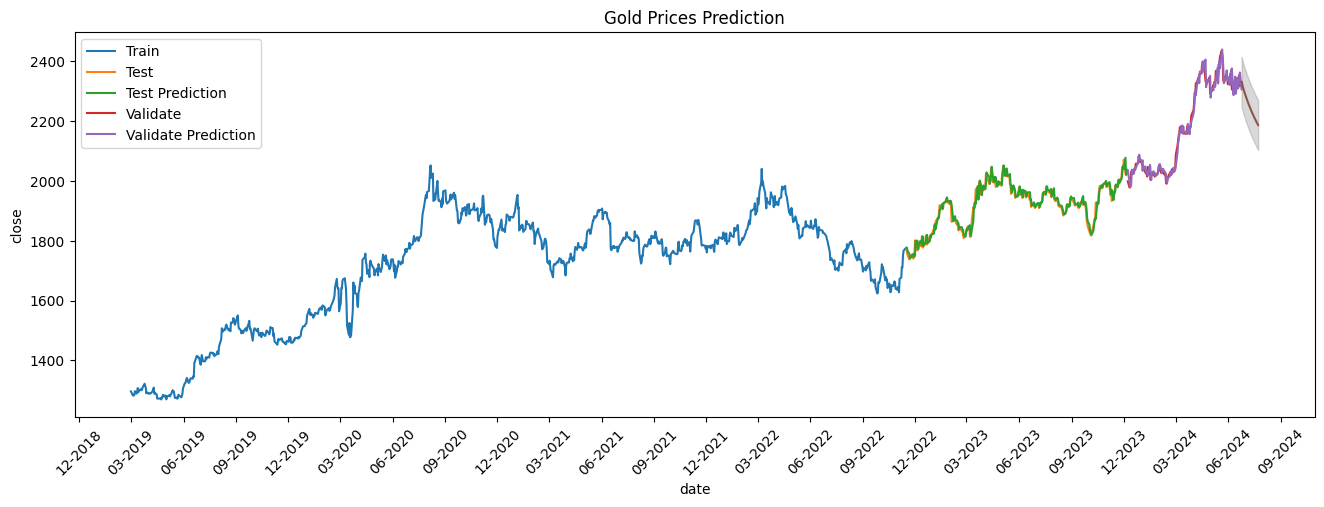

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)
plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45)  
plt.show()



In [65]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  12.348513851094337
MAPE:  0.643742866692257
RMSE:  16.598206048139897

** Validate **
MAE:  16.7298166232639
MAPE:  0.7550215088509388
RMSE:  21.645840205808405


Split dataset (6-3-1)

In [66]:
# Split the data
train_size = int(0.6 * len(sc_train))
test_size = int(0.3 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [67]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [68]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [69]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.12814, saving model to save_model_6_3_1.keras
16/16 - 15s - 913ms/step - loss: 0.1281
Epoch 2/80

Epoch 2: loss improved from 0.12814 to 0.04722, saving model to save_model_6_3_1.keras
16/16 - 0s - 24ms/step - loss: 0.0472
Epoch 3/80

Epoch 3: loss improved from 0.04722 to 0.02052, saving model to save_model_6_3_1.keras
16/16 - 0s - 28ms/step - loss: 0.0205
Epoch 4/80

Epoch 4: loss improved from 0.02052 to 0.01968, saving model to save_model_6_3_1.keras
16/16 - 0s - 26ms/step - loss: 0.0197
Epoch 5/80

Epoch 5: loss did not improve from 0.01968
16/16 - 0s - 18ms/step - loss: 0.0201
Epoch 6/80

Epoch 6: loss improved from 0.01968 to 0.01912, saving model to save_model_6_3_1.keras
16/16 - 0s - 25ms/step - loss: 0.0191
Epoch 7/80

Epoch 7: loss did not improve from 0.01912
16/16 - 0s - 17ms/step - loss: 0.0192
Epoch 8/80

Epoch 8: loss improved from 0.01912 to 0.01833, saving model to save_model_6_3_1.keras
16/16 - 0s - 27ms/step - loss: 0

In [70]:
# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)
     

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


In [71]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [72]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [73]:

# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [74]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.8956723338485317, 0.9111282843894899, 0.9312210200927358, 0.8991069895243002, 0.910784818821913]


In [75]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9228288531303406], [0.9296799302101135], [0.9343642592430115], [0.9380673170089722], [0.9420443177223206], [0.9464186429977417], [0.9508551955223083], [0.9551493525505066], [0.9592680931091309], [0.963252604007721], [0.9671408534049988], [0.9709429740905762], [0.9746547341346741], [0.978270947933197], [0.9817904233932495], [0.9852147698402405], [0.9885461330413818], [0.9917865991592407], [0.9949372410774231], [0.9979993104934692], [1.0009740591049194], [1.0038630962371826], [1.006667971611023], [1.009390115737915], [1.0120313167572021], [1.0145930051803589], [1.0170767307281494], [1.0194841623306274], [1.0218170881271362], [1.0240769386291504]]


In [76]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2344.02648236]
 [2352.00524672]
 [2357.46061631]
 [2361.77319739]
 [2366.40481242]
 [2371.49915164]
 [2376.66596071]
 [2381.66693598]
 [2386.46362123]
 [2391.10398263]
 [2395.63223788]
 [2400.06018763]
 [2404.38290337]
 [2408.59434596]
 [2412.69312708]
 [2416.68112096]
 [2420.56082654]
 [2424.33467338]
 [2428.00391096]
 [2431.569997  ]
 [2435.03438923]
 [2438.39896188]
 [2441.66551974]
 [2444.83572879]
 [2447.9116715 ]
 [2450.89501383]
 [2453.78756061]
 [2456.59125545]
 [2459.30818083]
 [2461.94000273]]


Margin of Error: 68.33430678477974
Lower Bound of Future Prediction: [[2275.69217557]
 [2283.67093994]
 [2289.12630953]
 [2293.4388906 ]
 [2298.07050563]
 [2303.16484485]
 [2308.33165392]
 [2313.3326292 ]
 [2318.12931445]
 [2322.76967584]
 [2327.29793109]
 [2331.72588084]
 [2336.04859659]
 [2340.26003918]
 [2344.3588203 ]
 [2348.34681417]
 [2352.22651976]
 [2356.0003666 ]
 [2359.66960417]
 [2363.23569022]
 [2366.70008245]
 [2370.06465509]
 [2373.33121295]
 [2376.501422  ]
 [2379.57736471]
 [2382.56070705]
 [2385.45325382]
 [2388.25694867]
 [2390.97387405]
 [2393.60569594]]
Upper Bound of Future Prediction: [[2412.36078914]
 [2420.33955351]
 [2425.7949231 ]
 [2430.10750417]
 [2434.7391192 ]
 [2439.83345842]
 [2445.00026749]
 [2450.00124277]
 [2454.79792802]
 [2459.43828941]
 [2463.96654466]
 [2468.39449441]
 [2472.71721016]
 [2476.92865275]
 [2481.02743387]
 [2485.01542774]
 [2488.89513332]
 [2492.66898017]
 [2496.33821774]
 [2499.90430379]
 [2503.36869602]
 [2506.73326866]
 [2509.99982

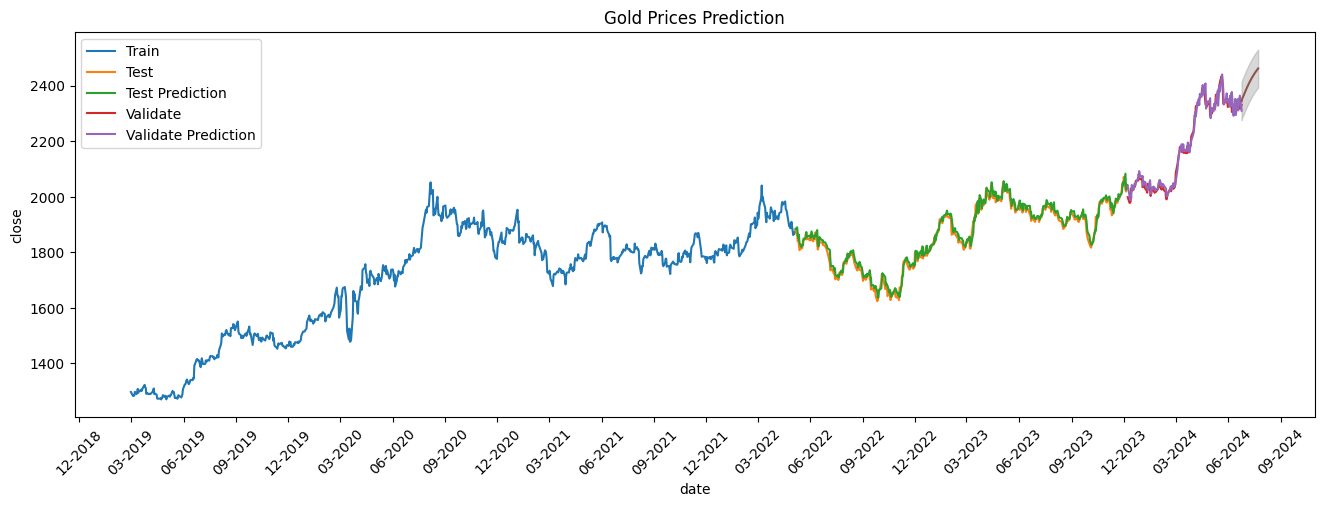

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)
plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45)  
plt.show()


In [78]:

evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  14.304683177310624
MAPE:  0.7733730289445055
RMSE:  18.31604045257484

** Validate **
MAE:  17.42880823206019
MAPE:  0.7907783107846363
RMSE:  22.428765681478637


Split dataset (5-3-2)

In [79]:
# Split the data
train_size = int(0.5 * len(sc_train))
test_size = int(0.3 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [80]:

# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [81]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [82]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.17403, saving model to save_model_5_3_2.keras
14/14 - 13s - 963ms/step - loss: 0.1740
Epoch 2/80

Epoch 2: loss improved from 0.17403 to 0.08275, saving model to save_model_5_3_2.keras
14/14 - 0s - 26ms/step - loss: 0.0827
Epoch 3/80

Epoch 3: loss improved from 0.08275 to 0.03840, saving model to save_model_5_3_2.keras
14/14 - 0s - 26ms/step - loss: 0.0384
Epoch 4/80

Epoch 4: loss improved from 0.03840 to 0.02447, saving model to save_model_5_3_2.keras
14/14 - 0s - 24ms/step - loss: 0.0245
Epoch 5/80

Epoch 5: loss improved from 0.02447 to 0.01878, saving model to save_model_5_3_2.keras
14/14 - 0s - 29ms/step - loss: 0.0188
Epoch 6/80

Epoch 6: loss improved from 0.01878 to 0.01778, saving model to save_model_5_3_2.keras
14/14 - 0s - 26ms/step - loss: 0.0178
Epoch 7/80

Epoch 7: loss improved from 0.01778 to 0.01743, saving model to save_model_5_3_2.keras
14/14 - 1s - 37ms/step - loss: 0.0174
Epoch 8/80

Epoch 8: loss did not improve f

In [83]:
# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


In [84]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [85]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values
  

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [86]:

# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [87]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.8956723338485317, 0.9111282843894899, 0.9312210200927358, 0.8991069895243002, 0.910784818821913]


In [88]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.94517582654953], [0.981110155582428], [1.0131136178970337], [1.0417064428329468], [1.0697439908981323], [1.0988773107528687], [1.1291091442108154], [1.1598094701766968], [1.1904546022415161], [1.2208020687103271], [1.2507624626159668], [1.2802481651306152], [1.3091206550598145], [1.33720862865448], [1.3643447160720825], [1.3903855085372925], [1.4152153730392456], [1.4387438297271729], [1.4609026908874512], [1.4816467761993408], [1.5009534358978271], [1.518823266029358], [1.535277247428894], [1.5503535270690918], [1.56410551071167], [1.576596975326538], [1.5878996849060059], [1.5980908870697021], [1.607250690460205], [1.6154597997665405]]


In [89]:

# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2370.0517676 ]
 [2411.90088719]
 [2449.1721194 ]
 [2482.47132332]
 [2515.1238518 ]
 [2549.0525161 ]
 [2584.26050935]
 [2620.01410897]
 [2655.70342977]
 [2691.04608922]
 [2725.93796396]
 [2760.27701311]
 [2793.90191488]
 [2826.61316893]
 [2858.21585634]
 [2888.54296324]
 [2917.45982344]
 [2944.8610641 ]
 [2970.66727381]
 [2994.82583556]
 [3017.31037145]
 [3038.12157562]
 [3057.28388236]
 [3074.84171762]
 [3090.85727777]
 [3105.40483747]
 [3118.56797304]
 [3130.43664708]
 [3141.10415411]
 [3150.66448281]]


Margin of Error: 477.47596189728563
Lower Bound of Future Prediction: [[1892.5758057 ]
 [1934.42492529]
 [1971.69615751]
 [2004.99536143]
 [2037.6478899 ]
 [2071.57655421]
 [2106.78454745]
 [2142.53814707]
 [2178.22746787]
 [2213.57012732]
 [2248.46200207]
 [2282.80105121]
 [2316.42595299]
 [2349.13720703]
 [2380.73989444]
 [2411.06700135]
 [2439.98386154]
 [2467.3851022 ]
 [2493.19131191]
 [2517.34987366]
 [2539.83440955]
 [2560.64561372]
 [2579.80792046]
 [2597.36575573]
 [2613.38131588]
 [2627.92887557]
 [2641.09201114]
 [2652.96068518]
 [2663.62819221]
 [2673.18852091]]
Upper Bound of Future Prediction: [[2847.5277295 ]
 [2889.37684909]
 [2926.6480813 ]
 [2959.94728522]
 [2992.5998137 ]
 [3026.528478  ]
 [3061.73647125]
 [3097.49007087]
 [3133.17939167]
 [3168.52205112]
 [3203.41392586]
 [3237.75297501]
 [3271.37787678]
 [3304.08913083]
 [3335.69181823]
 [3366.01892514]
 [3394.93578534]
 [3422.337026  ]
 [3448.1432357 ]
 [3472.30179746]
 [3494.78633334]
 [3515.59753752]
 [3534.7598

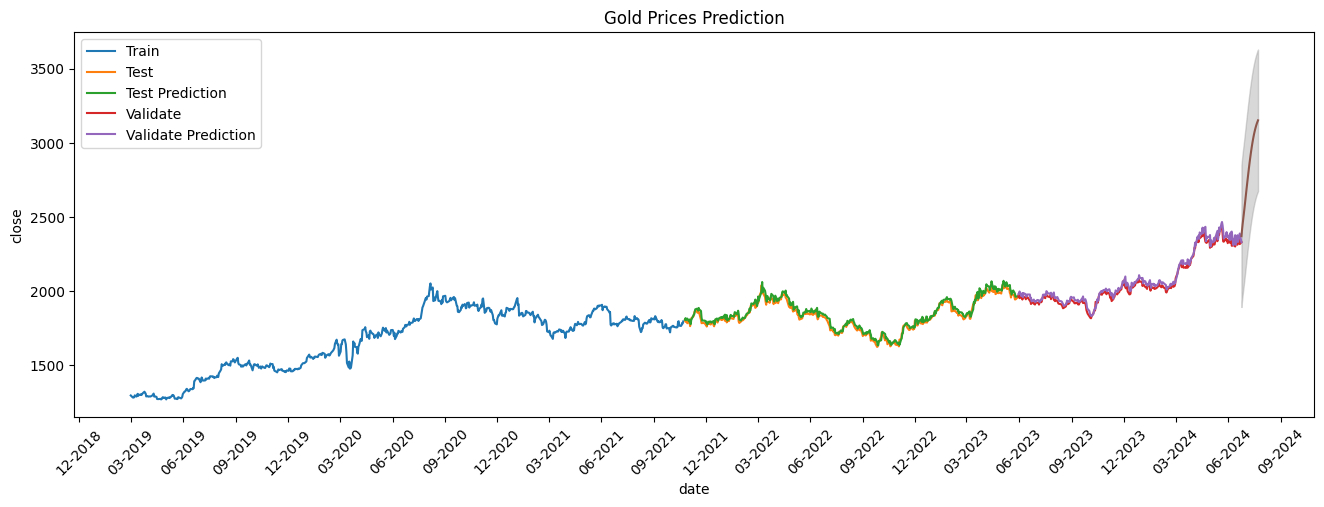

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)
plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45)  
plt.show()


In [91]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  18.119245830735654
MAPE:  0.9852000400658266
RMSE:  22.962199968101054

** Validate **
MAE:  22.53342539280321
MAPE:  1.0868850722788175
RMSE:  28.340729376074353
